# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = 'drive/MyDrive/Data_analitic/Python/Pandas_Python/yulu_rental.csv'
df = pd.read_csv(data_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [ ]:
print(f'Кількість рядків: {df.shape[0]}, кількість колонок: {df.shape[1]}')

Кількість рядків: 10886, кількість колонок: 19


In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [ ]:
daily_count = df['count'].resample('D').sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

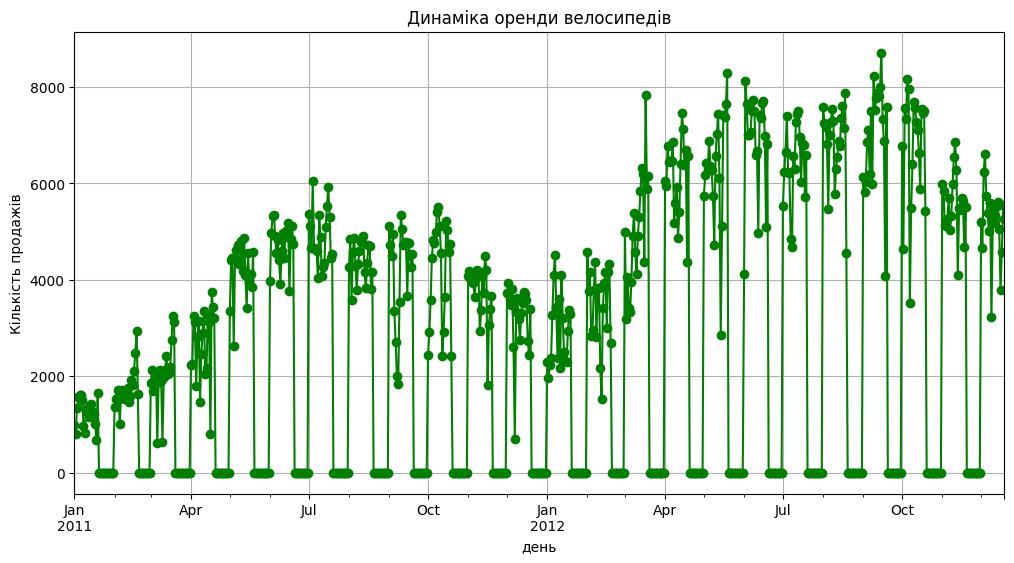

In [ ]:
daily_count.plot(
    kind='line',
    marker='o',
    color='green',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='день',
    ylabel='Кількість продажів',
    grid=True
);

In [ ]:
df.pivot_table(index='year', columns='month', values='count', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,23552,32844,38735,50517,79713,89776,92848,83296,79104,79522,70889,61183
2012,56332,66269,94766,116885,120434,130957,121769,130220,133425,127912,105551,98977


In [ ]:
df.pivot_table(index='year', columns='month', values='count', aggfunc='mean').round(2)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,54.65,73.64,86.85,111.03,174.81,196.88,203.61,182.67,174.62,174.77,155.46,134.17
2012,124.35,145.65,208.28,257.46,264.11,287.19,267.04,285.57,292.60,280.51,231.98,217.05


In [ ]:
df.pivot_table(index='year', columns='month', values='holiday', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,24,0,0,24,0,0,24,0,24,24,24,0
2012,47,0,0,24,0,0,24,0,24,24,24,0


In [ ]:
num_days = len(df) // 24
print(num_days)

453


- Заломи є бо в деякі дні небуло оренди велосипедів (моє перше припущення). Можливо це повязано з погодними умовами. Але скоріше за все, основна причина заломів - пропущені дані. Оскільки всього за період з січня 2011 по грудень 2012 року є дані за 453 дня. Має бути приблизно 712 днів за два роки.
- Прибрати заломи можна виключивши дпропущені дні з графіка. Але мені здається, що їх варто лишити, та дослідити причини.
- У 2012 році орендували велосипедів більше, ніж у 2011. В 2011 році піковим місяцем був Липень. Кількість оренди почала рости починаючи з квітня, закінчуючи груднем поточного року. Найменша кількість оренди була в зимку 2011 року. У 2012 році тенденція зберіглася. Це логічно, оскільки взимку погодні умови меншсприятливі до велопрогулянок, тоді, як в теплі місяця люди охоче катаються на велосипедах (якщо брати до уваги, що краіна має сезонні коливання температури).


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [ ]:
season_avg = df.groupby('season')['count'].mean()

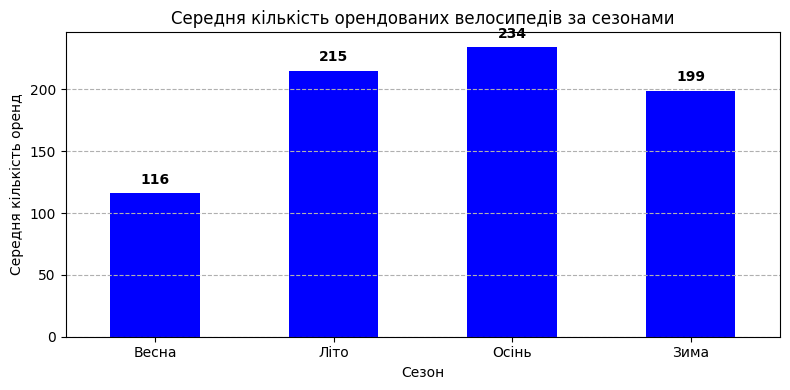

In [ ]:

season_avg.plot.bar(
    figsize=(8, 4),
    color='blue',
    title='Середня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд',
)

plt.xticks(ticks=[0, 1, 2, 3], labels=['Весна', 'Літо', 'Осінь', 'Зима'], rotation=0)
plt.grid(axis='y', linestyle='--')
for i, value in enumerate(season_avg):
    plt.text(i, value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

1. Найбільш високий сезон - Осінь
За кількістю оренд велосипедів, осінь посідає перше місце серед усіх сезонів. Це свідчить про підвищену активність користувачів у цей період.

2. Різниця між сезонами
Різниця між найактивнішим (осінь) та наступним сезоном становить 68 одиниць (середніх оренд), що є суттєвим показником.

3. Можливі причини
Погода восени зазвичай помірна: не така спекотна, як улітку, і не така холодна, як узимку. Комфортні температури та менше опадів можуть сприяти приємнішим умовам для велопрогулянок. Це може пояснювати популярність сезону серед користувачів.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [ ]:
month_mean = df.groupby('month')['count'].mean()

In [ ]:
month_labels = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
                'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']

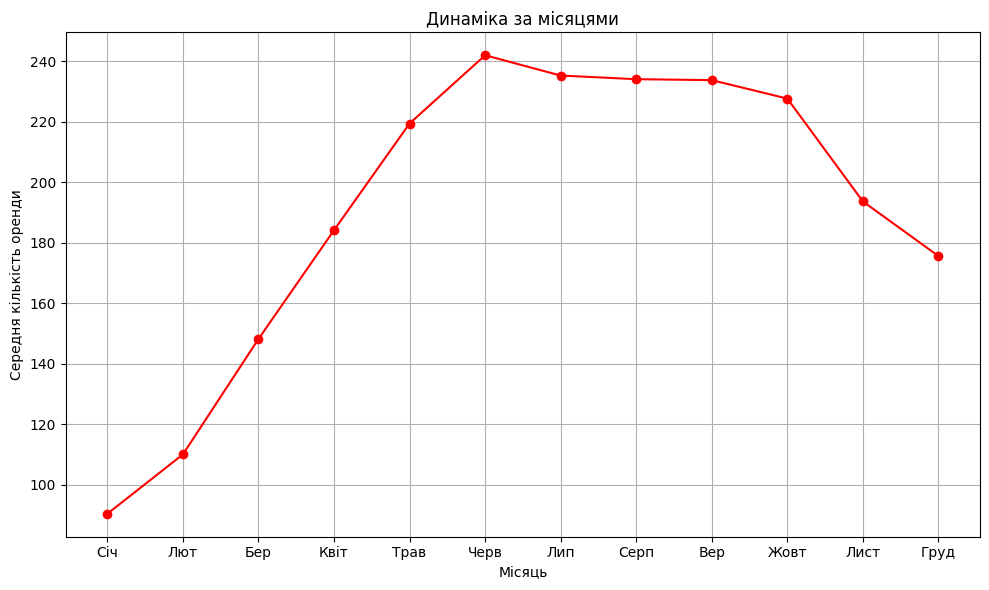

In [ ]:

month_mean.plot(
    kind='line',
    color='red',
    marker='o',
    figsize=(10, 6),
    title='Динаміка за місяцями',
    xlabel='Місяць',
    ylabel='Середня кількість оренди',
    grid=True
)
plt.xticks(ticks=range(1, 13), labels=month_labels)
plt.tight_layout()
plt.show()

У які місяці спостерігається пік та спад оренди?
Найбільший пік оренди припадає на червень, що є логічним — це початок літа, коли погода вже тепла, але ще не надто спекотно. Після червня спостерігається поступовий спад, але суттєве зниження кількості оренд починається після жовтня, коли настає холодна та нестабільна погода.
Чи збігається ця закономірність з результатами попереднього завдання?
Так, динаміка росту і спаду кількості оренд повністю збігається з попередніми спостереженнями. Починаючи з весни кількість оренд зростає, досягаючи піку влітку, а потім поступово знижується восени та значно падає взимку.
Як може вплинути клімат на оренду велосипедів протягом року?
Клімат має прямий вплив на попит на оренду велосипедів:

Взимку (грудень–лютий) попит найнижчий — через холод, вітер, опади, ожеледицю та короткий світловий день. Такі умови не сприяють комфортній та безпечній їзді на велосипеді.
З настанням тепла (березень–травень) попит зростає, а влітку (червень–серпень) досягає максимуму.
Восени (вересень–листопад) оренда зменшується через зниження температури та погіршення погоди.

####Цікаво, що у грудні оренд більше, ніж у січні. Це може бути пов'язано з:

Активністю людей у грудні перед зимовими святами (покупки, відпочинок, вільний час).
У січні — період після свят, коли багато хто ще відпочиває або знижує активність, що впливає на зниження кількості оренд.
У лютому спостерігається невелике пожвавлення — люди поступово повертаються до звичного ритму життя.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [ ]:
weather_day = df['weather'].value_counts()

In [ ]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

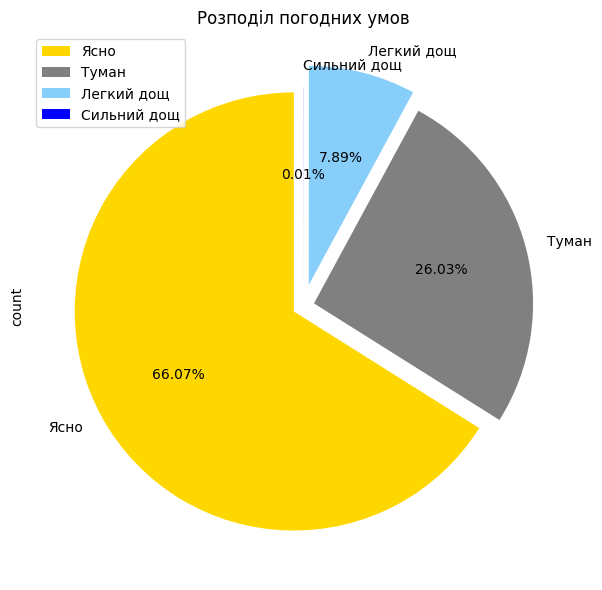

In [ ]:
plt.figure(figsize=(8, 6))
weather_day.plot.pie(
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=['#FFD700','#808080','#87CEFA','#0000FF'],
    explode = (0.05, 0.05, 0.1, 0),
)
plt.title('Розподіл погодних умов')
plt.legend(labels, loc='upper left')
plt.tight_layout()
plt.show()

1. Яка погода переважає в датасеті?
У датасеті переважає ясна погода. Більшість днів характеризуються сприятливими погодними умовами — без опадів і з комфортною температурою.

2. Чи є дні із сильним дощем? Яка їх частка?
Дні із сильним дощем у датасеті становлять дуже малу частку (0,01%). Це може свідчити або про обмеження збору інформації в періоди несприятливої погоди. Або з особливістю клімата краіни.

3. Як погодні умови впливають на попит на оренду велосипедів?
Загалом, чим кращі погодні умови, тим вищий попит на оренду велосипедів. Ясна, тепла (але не надмірно спекотна) погода сприяє активному використанню велосипедів. Навпаки, холод, дощ або надмірна спека знижують попит на оренду.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

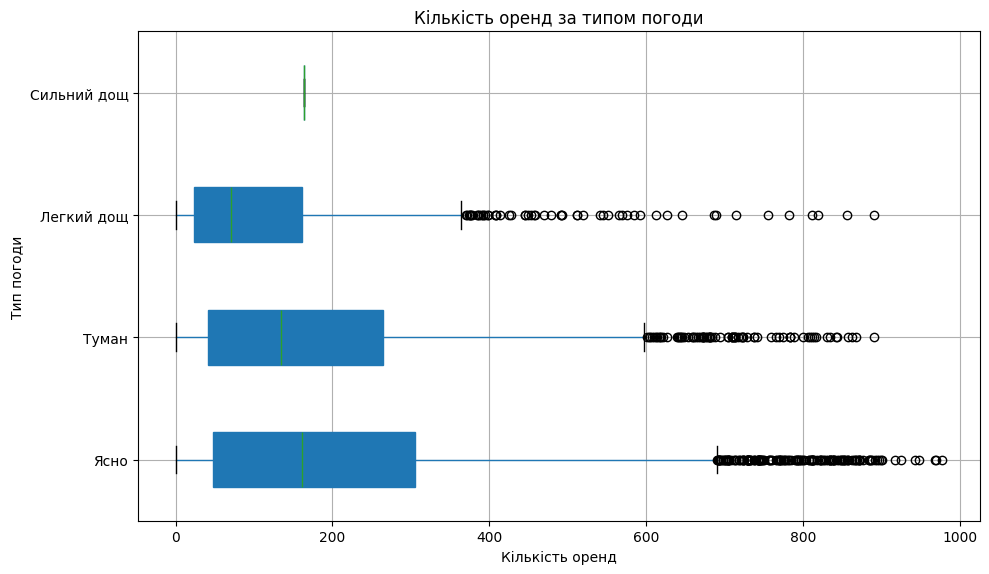

In [ ]:
df.boxplot(
    column='count',
    by='weather',
    vert=False,
    figsize=(10, 6),
    grid=True,
    patch_artist=True
)

plt.title('Кількість оренд за типом погоди')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Тип погоди')
plt.yticks(
    ticks=[1, 2, 3, 4],
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)

plt.tight_layout()
plt.show()

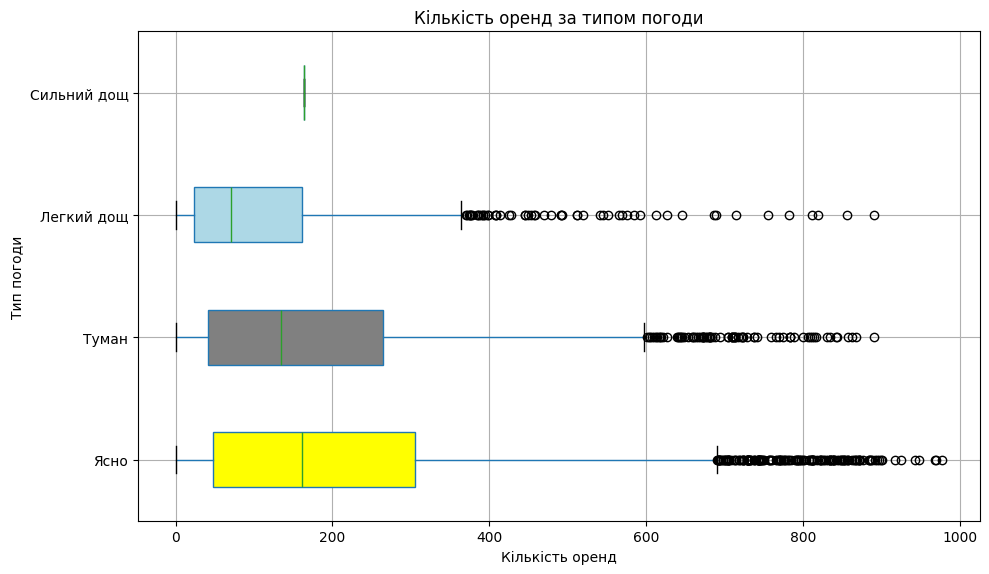

In [ ]:
ax = df.boxplot(
    column='count',
    by='weather',
    vert=False,
    patch_artist=True,
    figsize=(10, 6),
    grid=True
)


colors = ['yellow', 'grey', 'lightblue', 'blue']


for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)


plt.title('Кількість оренд за типом погоди')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Тип погоди')
plt.yticks([1, 2, 3, 4], ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
plt.tight_layout()
plt.show()


- Найвища медіана кількості оренд спостерігається при ясній погоді. Це також категорія з найбільшою кількістю даних.
- При тумані або хмарності та легкому дощі кількість оренд помітно знижується, однак все ще залишається стабільною.
- Сильний дощ або злива має найменше спостережень, тому важко об'єктивно оцінити характер розподілу. Візуалізація показує мінімальну активність.
- Розкид значень найбільший при ясній погоді, а також при легкому дощі є викиди, що свідчить про дні з аномально великою кількістю оренд.
- Мінімальне значення кількості оренд = 0 спостерігається в усіх категоріях погоди. Це може свідчити про дні з повною відсутністю оренд або пропущені значення (що більш імовірно в цих даних).

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

In [ ]:
season_colors = {
    1: 'skyblue',   # зима
    2: 'green',  # весна
    3: 'red',    # літо
    4: 'orange' # осінь
}

colors = df['season'].map(season_colors)

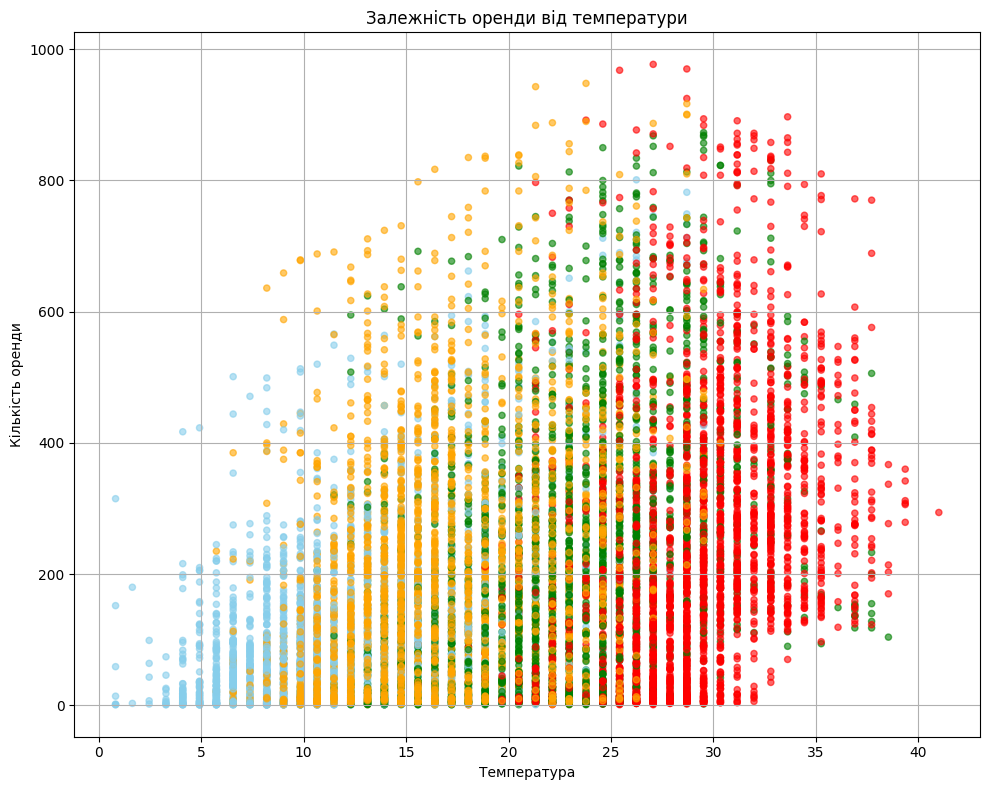

In [ ]:
df.plot(
    kind='scatter',
    x='temp',
    y='count',
    color=colors,
    alpha=0.6,
    figsize=(10, 8),
    title='Залежність оренди від температури'
)
plt.xlabel('Температура')
plt.ylabel('Кількість оренди')
plt.grid(True)
plt.tight_layout()
plt.show()

Спостерігається зв’язок між температурою та кількістю оренд. Найбільша активність помітна в діапазоні температур від 10°C до 34°C, що є комфортними умовами для велосипедних прогулянок.
Водночас, ця залежність частково відображає сезонність — адже температура змінюється разом із порами року. У холодну пору року (зима/осінь), а також під час надмірної спеки, кількість оренд знижується. Це може бути пов’язано з опадами, слизькими дорогами або фізичним дискомфортом під час поїздок.
Отже, температура є одним з важливих факторів, але вона також є похідною сезонних змін. Для точнішого аналізу варто врахувати ще й погодні умови (опади, вітер) та тип дня (вихідний/святковий).

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

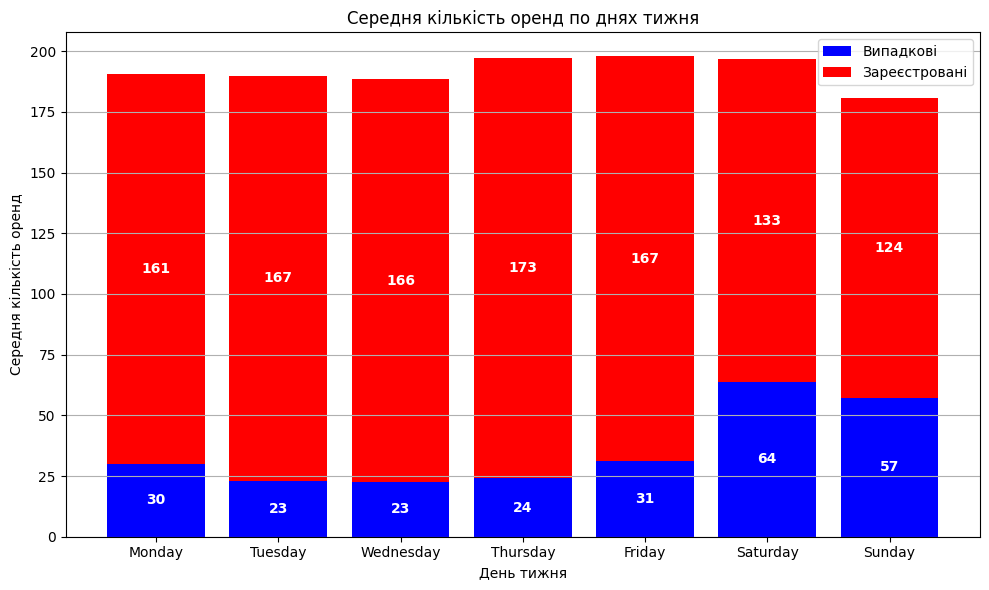

In [ ]:
grouped = df.groupby('weekday')[['casual', 'registered']].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(days_order)

plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['casual'], label='Випадкові', color='blue')
plt.bar(grouped.index, grouped['registered'], bottom=grouped['casual'], label='Зареєстровані', color='red')


for i, (casual, registered) in enumerate(zip(grouped['casual'], grouped['registered'])):
    plt.text(i, casual / 2, f'{casual:.0f}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    plt.text(i, casual + registered / 2, f'{registered:.0f}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.title('Середня кількість оренд по днях тижня')
plt.xticks()
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


- Найвища оренда серед зареєстрованих користувачів спостерігається у четвер, а також високі показники в п’ятницю та суботу. Це може бути пов’язано з тим, що багато людей користуються велосипедом як засобом пересування перед вихідними або для неспішних прогулянок після роботи.
- У неділю попит серед зареєстрованих користувачів знижується, що, можливо, пов’язано з відпочинком або бажанням підготуватися до робочого тижня.
- Серед випадкових користувачів (casual) навпаки — найбільше оренд у вихідні дні, особливо в суботу та неділю. Це свідчить про підвищену активність туристів або сімей, які орендують велосипеди для дозвілля.

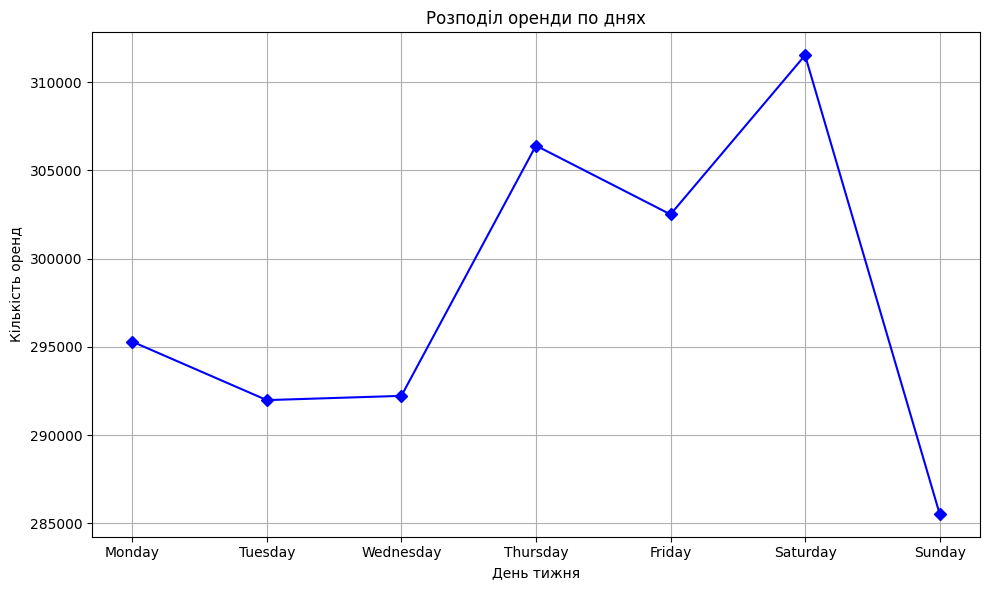

In [ ]:
date = df.groupby('weekday')['count'].sum()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
date = date.reindex(days_order)


plt.figure(figsize=(10, 6))
date.plot(kind='line', marker='D', color='blue')

plt.title('Розподіл оренди по днях')
plt.xlabel('День тижня')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

- Найбільша кількість оренд велосипедів спостерігається в суботу, а також у четвер і п’ятницю. Це може пояснюватися тим, що субота є вихідним днем, коли багато людей прагнуть провести час на свіжому повітрі, відпочити з родиною або просто покататися на велосипеді. Четвер і п’ятниця - це завершення робочого тижня, і ймовірно, дехто вже планує свій відпочинок.
-Найменша кількість оренд - у неділю. Можливо, це пов’язано з бажанням людей відпочити вдома або підготуватися до нового робочого тижня. Також не виключено, що на кількість оренд у неділю вплинула наявність пропущених даних - частина днів могла бути не зафіксована у датасеті.

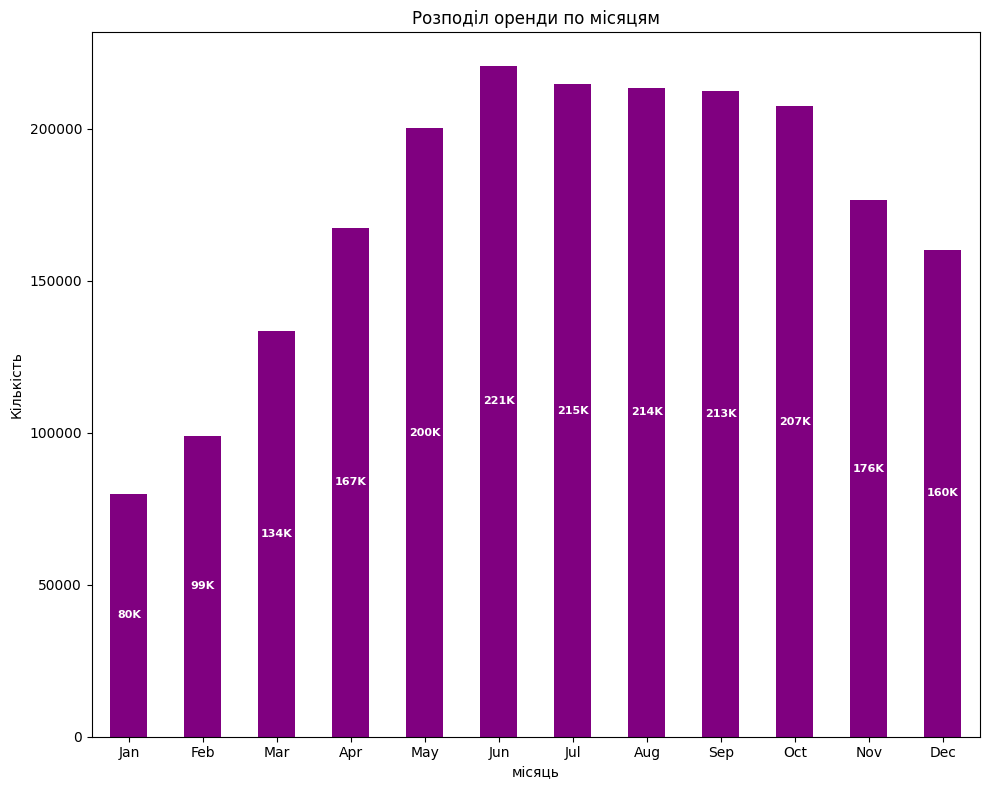

In [ ]:
months_g= df.groupby('month')['count'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


months_g.plot(
   kind='bar',
       figsize=(10,8),
       color='purple',
          alpha=1,
)

for i, value in enumerate(months_g):
   plt.text(i, value / 2, f'{round(value / 1000)}K', ha='center', va='center', fontsize=8, fontweight='bold', color='white')

plt.title('Розподіл оренди по місяцям')
plt.xlabel('місяць')
plt.xticks(ticks=range(0, 12), labels=months, rotation=0)
plt.ylabel('Кількість')
plt.grid(False)
plt.tight_layout()
plt.show()

Найбільша кількість оренд за весь період спостережень була у червні — близько 221 тис.
Найменша кількість оренд зафіксована у січні — близько 88 тис.
Основна причина таких відмінностей — погодні умови: теплий і сприятливий червень сприяє активному використанню велосипедів, тоді як холодний січень обмежує бажання та можливість кататися.